In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# Quantum Machine Learning
import qiskit
from qiskit.utils import algorithm_globals as alg
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [2]:
# Load our data 
df = pd.read_csv("C:\\Datasets\\parkinson\\parkinsons.csv")

In [3]:
df=df.head(50)

In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df['status'].value_counts().head()

1    36
0    14
Name: status, dtype: int64

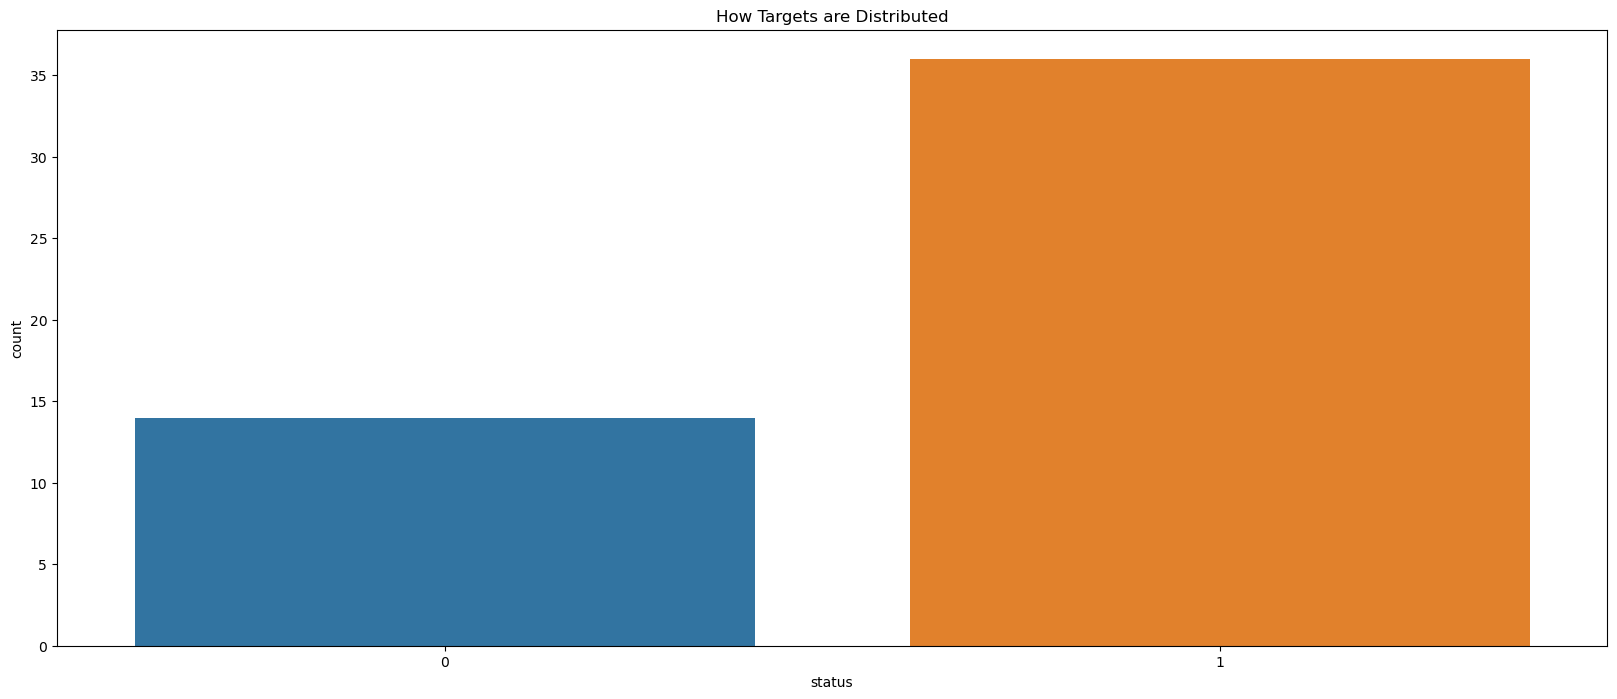

In [6]:
# Plot out the Targets 
fig = plt.figure(figsize=(20,8))
sns.countplot(x='status',data = df)
plt.title('How Targets are Distributed')
plt.show()

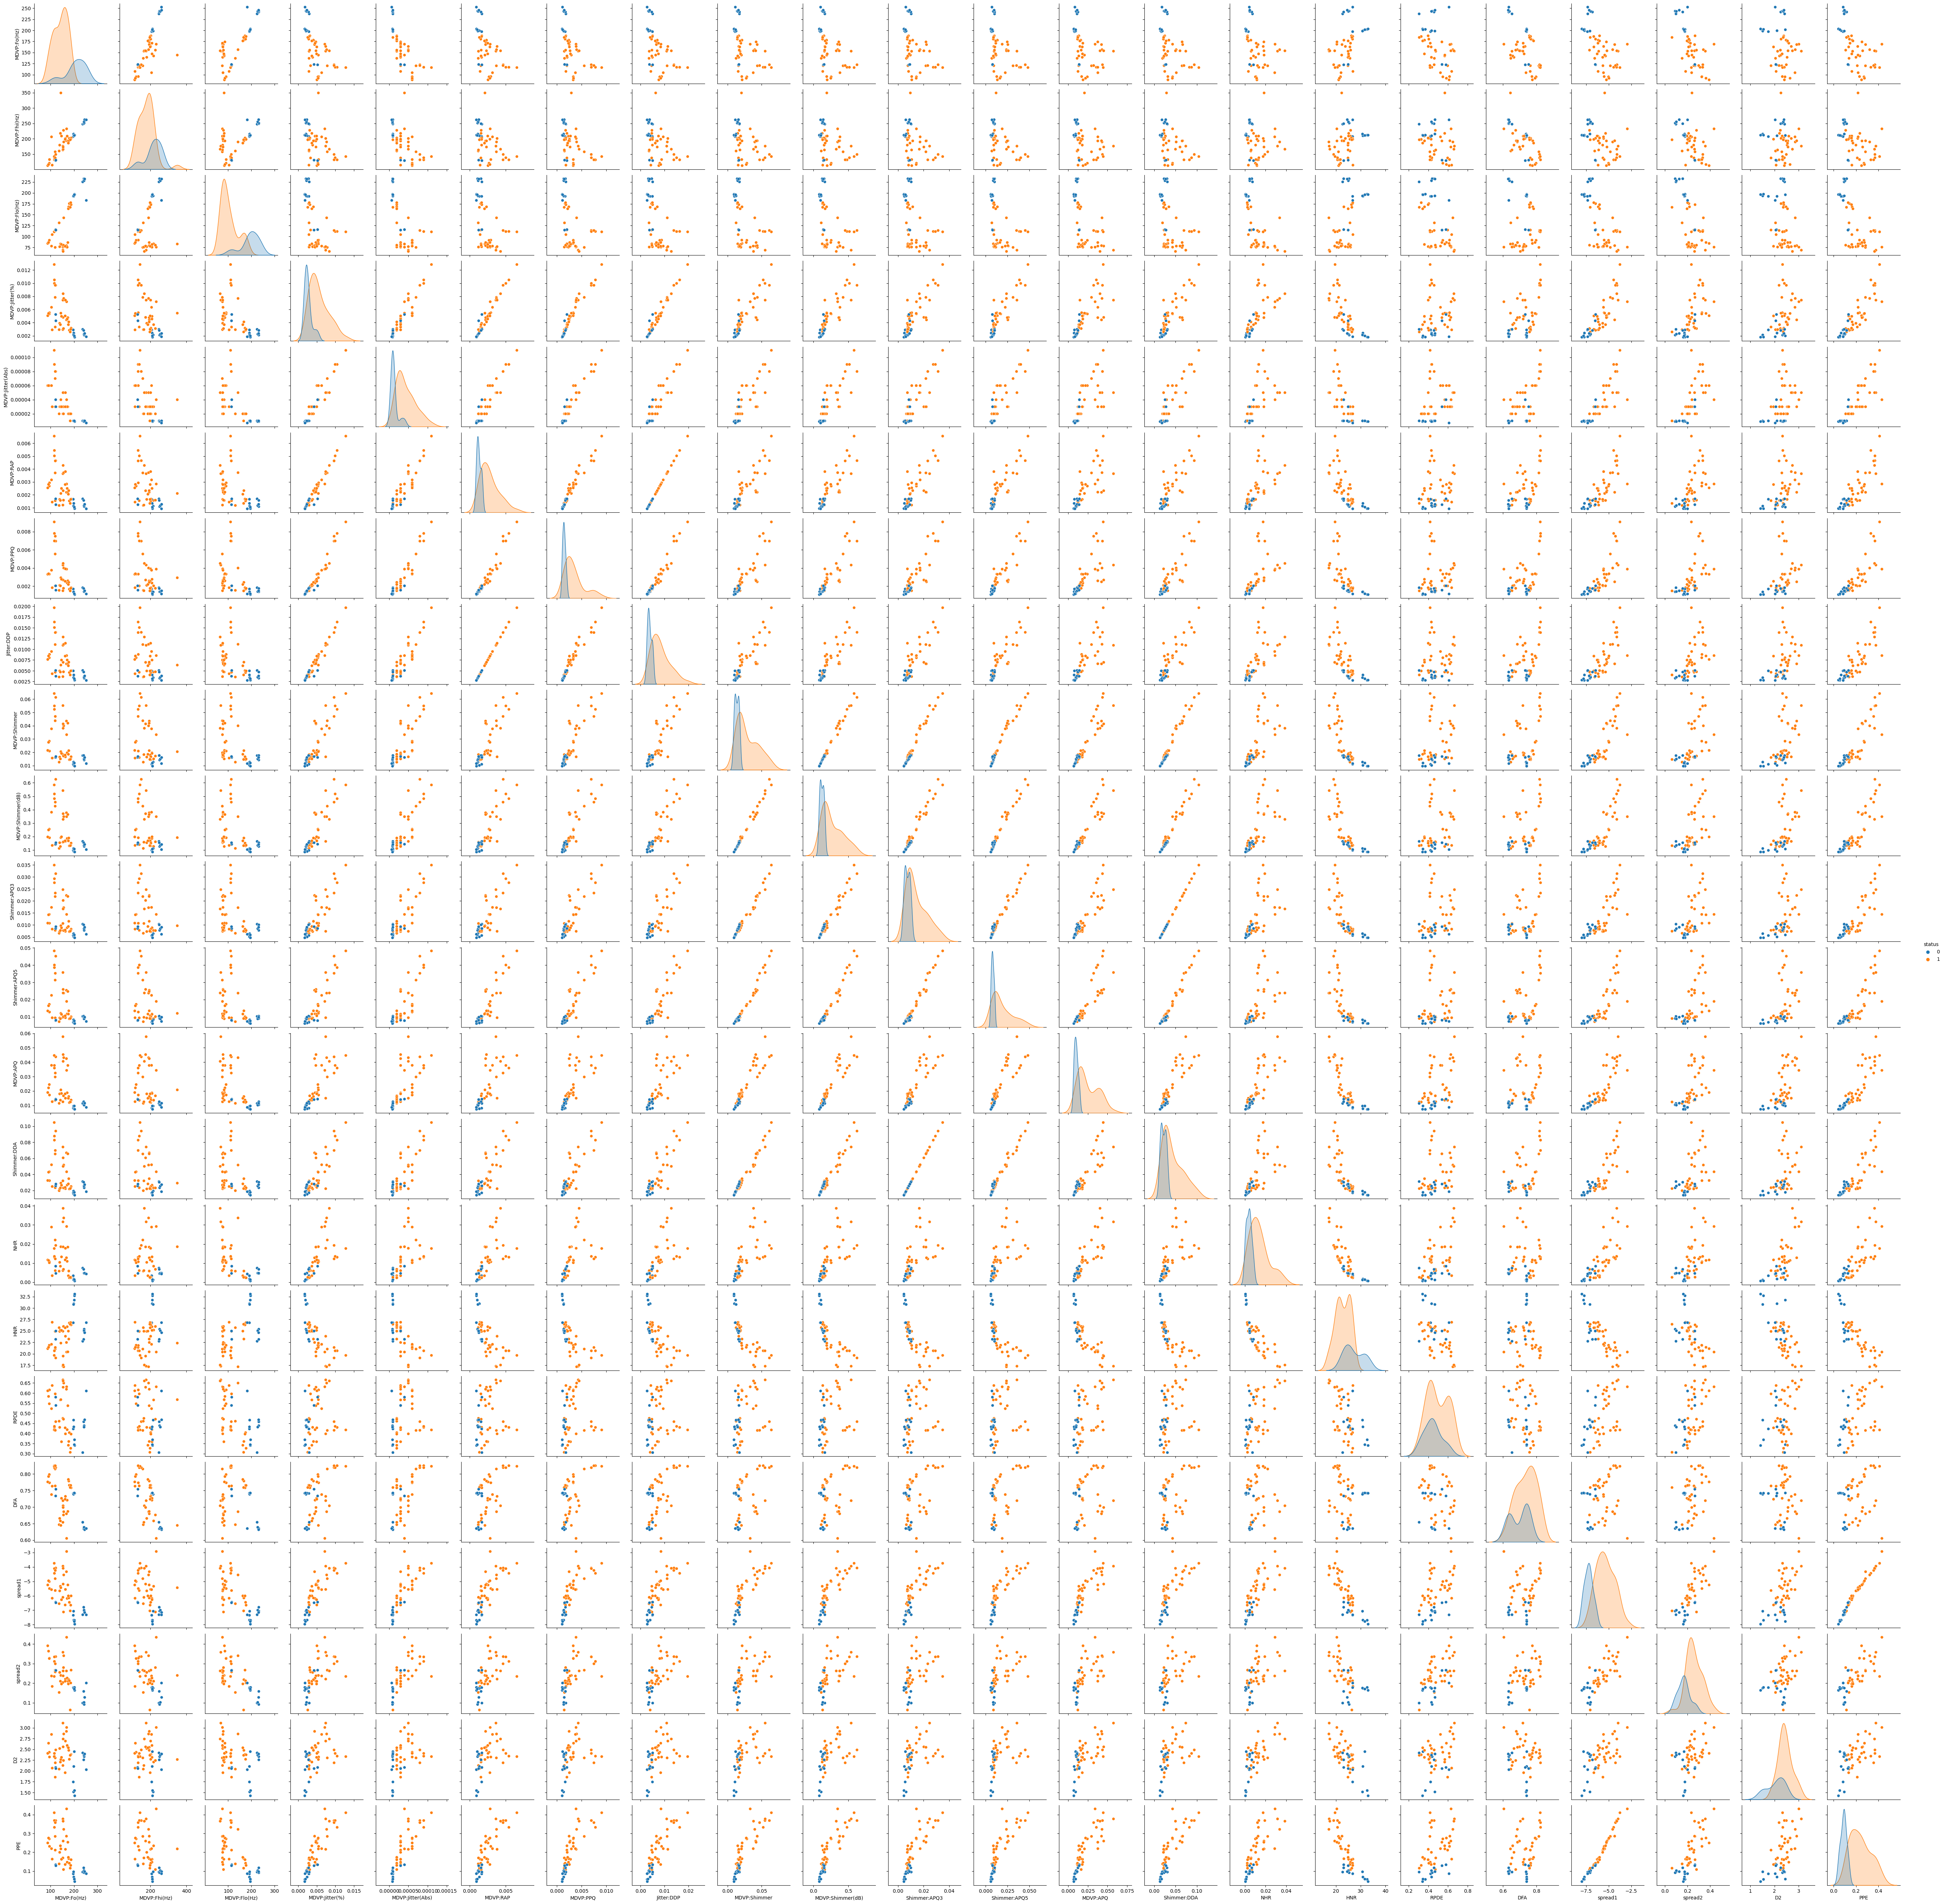

In [7]:
#Draw a pairplot with the target as hue
sns.pairplot(df,hue='status')
plt.show()

In [8]:
# Choosing our labels and features
X = df.drop(['status','name'],axis=1)
y = df['status']

In [9]:
#  I will scale the data  features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# CLASSICAL MACHINE LEARNING :: SUPPORT VECTOR CLASSIFIER

In [11]:
from sklearn.metrics import classification_report
svc = SVC()
svc.fit(X_train,y_train)
training_score = svc.score(X_train,y_train)
testing_score = svc.score(X_test,y_test)
sv_predictions = svc.predict(X_test)
print(f"The training score is {training_score}\nThe testing score is {testing_score}")
print("\n")
print(f"The Classification Report is {classification_report(y_test,sv_predictions)}")

The training score is 0.975
The testing score is 0.9


The Classification Report is               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [12]:
X.shape

(50, 22)

# QUANTUM MACHINE LEARNING PEGASOS QSVC

In [13]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel
kernel = FidelityQuantumKernel()
feature_map = ZFeatureMap(22)

In [14]:
p_svc = PegasosQSVC(quantum_kernel=kernel)

In [ ]:
p_svc.fit(X_train,y_train)